In [2]:
!conda list

# packages in environment at D:\Anaconda3:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2024.02             py311_mkl_1  
abseil-cpp                20211102.0           hd77b12b_0  
aiobotocore               2.7.0           py311haa95532_0  
aiohttp                   3.9.3           py311h2bbff1b_0  
aioitertools              0.7.1              pyhd3eb1b0_0  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
altair                    5.0.1           py311haa95532_0  
anaconda-anon-usage       0.4.3           py311hfc23b7f_100  
anaconda-catalogs         0.2.0           py311haa95532_0  
anaconda-client           1.12.3          py311haa95532_0  
anaconda-cloud-auth       0.1.4           py311haa95532_0  
anaconda-navigator        2.5.2           py311haa95532_0  
anaconda-project          0.11.1          py311haa95532_0  
anyio                     4.2.0           py31

# ANN for image classification

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [3]:
print(torch.__version__)

2.3.0


In [5]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

## Data processing

MNIST IMAGE --> Tensor

In [7]:
transform = transforms.ToTensor()

In [8]:
train_data = datasets.MNIST(root='./Data', train = True, download=True, transform=transform)

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [10]:
test_data = datasets.MNIST(root = './Data', train=False, download=True, transform=transform)

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [13]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
image, label = train_data[0]

In [15]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [17]:
image.shape

torch.Size([1, 28, 28])

In [16]:
label

5

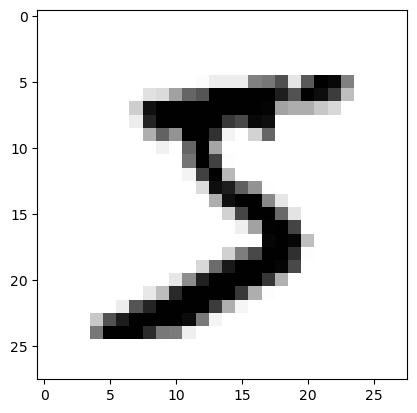

In [22]:
plt.imshow(image.reshape((28,28)), cmap='gist_yarg')

In [23]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)

test_loader = DataLoader(test_data, batch_size = 500, shuffle=False)

In [26]:
from torchvision.utils import make_grid

np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [27]:
for images, labels in train_loader:
    
    break

In [29]:
images.shape

torch.Size([100, 1, 28, 28])

In [31]:
labels[:12]

tensor([7, 2, 3, 5, 8, 5, 3, 6, 9, 9, 1, 3])

Labels [   7    2    3    5    8    5    3    6    9    9    1    3]


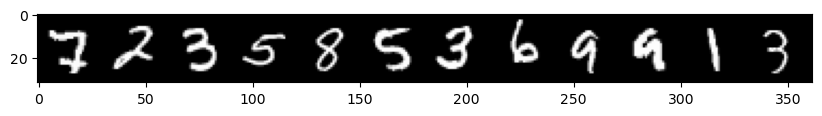

In [33]:
print('Labels', labels[:12].numpy())

im = make_grid(images[:12], nrow=12)
plt.figure(figsize=(10,4))

plt.imshow(np.transpose(im.numpy(), (1,2,0)))

## Model Preparation

In [34]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz = 784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        # Es así por que es un clasificacion multiclase
        return F.log_softmax(X, dim = 1)

In [36]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [37]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [38]:
criterion = nn.CrossEntropyLoss()
optimzer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [46]:
images.view(100,-1).shape

torch.Size([100, 784])

## Model Training

In [56]:
import time

start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct =[]

for i in range(epochs):
    i += 1
    trn_corr =0
    tsn_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        y_pred = model.forward(X_train.view(100, -1))
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        optimzer.zero_grad()
        loss.backward()
        optimzer.step()

        if b%200 == 0:
            accuary = trn_corr.item()*100/(100*b)
            print(f"Epoch {i} batch {b} loss {loss.item()} accuracy {accuary}")
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(500, -1))
            predicted = torch.max(y_val.data, 1)[1]
            tsn_corr += (predicted == y_test).sum()
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tsn_corr)

    


Epoch 1 batch 200 loss 0.052435871213674545 accuracy 96.615
Epoch 1 batch 400 loss 0.1412188559770584 accuracy 96.84
Epoch 1 batch 600 loss 0.044501304626464844 accuracy 96.95833333333333
Epoch 2 batch 200 loss 0.06101962551474571 accuracy 97.72
Epoch 2 batch 400 loss 0.14648248255252838 accuracy 97.705
Epoch 2 batch 600 loss 0.18885089457035065 accuracy 97.69666666666667
Epoch 3 batch 200 loss 0.1477620154619217 accuracy 98.135
Epoch 3 batch 400 loss 0.035827163606882095 accuracy 98.1725
Epoch 3 batch 600 loss 0.07011963427066803 accuracy 98.16
Epoch 4 batch 200 loss 0.04215352609753609 accuracy 98.6
Epoch 4 batch 400 loss 0.009303726255893707 accuracy 98.4875
Epoch 4 batch 600 loss 0.06453799456357956 accuracy 98.45666666666666
Epoch 5 batch 200 loss 0.04552556201815605 accuracy 98.805
Epoch 5 batch 400 loss 0.11829545348882675 accuracy 98.705
Epoch 5 batch 600 loss 0.025156788527965546 accuracy 98.72833333333334
Epoch 6 batch 200 loss 0.012063378468155861 accuracy 99.215
Epoch 6 bat

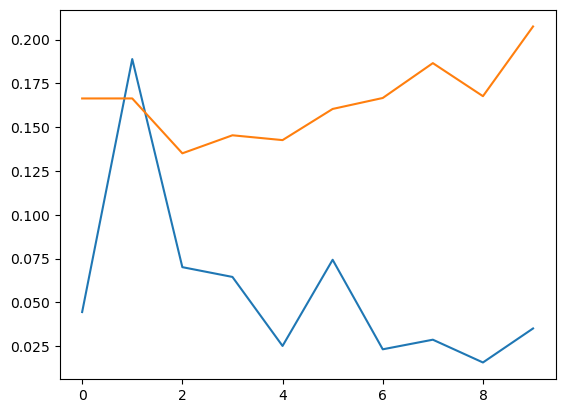

In [60]:
plt.plot([i.item() for i in train_losses])
plt.plot([i.item() for i in test_losses])

# CNN 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

In [6]:

from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix


In [8]:
from torch.utils.data import DataLoader

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
transform = transforms.ToTensor()

In [11]:
train_data = datasets.MNIST(root='./Data', train = True, download=True, transform=transform)

In [12]:
test_data = datasets.MNIST(root='./Data', train=False, download=True, transform=transform)

In [14]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)

In [15]:
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

Ejemplo de Capa Convolouciona

In [16]:
conv1 = nn.Conv2d(1, 6, 3,1)

- 1 Canal de color
- 6 filtros
- 3x3 Kernel
- Paso de 1

In [17]:
conv2 = nn.Conv2d(6, 16, 3, 1)

In [18]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [19]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [20]:
x = X_train.view(1,1,28,28)

In [22]:
x


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [23]:
x = F.relu(conv1(x))

Como no se le aplico padding pierde pixeles de cada lado

In [24]:
x.shape

torch.Size([1, 6, 26, 26])

In [25]:
x = F.max_pool2d(x, 2, 2)

In [27]:
x.shape

torch.Size([1, 6, 13, 13])

In [29]:
x = F.relu(conv2(x))

In [30]:
x = F.max_pool2d(x,2,2)

In [31]:
x.shape

torch.Size([1, 16, 5, 5])

In [28]:
11/2

5.5

In [32]:
x.view(-1, 16*5*5).shape

torch.Size([1, 400])

In [33]:
x = x.view(-1, 16*5*5)

In [35]:
x.shape

torch.Size([1, 400])

## CNN Model 

In [41]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        # Ajustar la el batchsize a una sola para que pueda pasar por lo parametros del linear layer
        X = X.view(-1, 16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.log_softmax(self.fc3(X), dim = 1)

        return X

In [42]:
torch.manual_seed(42)
model = CNN()

In [43]:
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [45]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)


In [47]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [48]:
test_loader

In [51]:
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    i+=1

    trn_corr = 0
    tst_corr = 0
    
    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model.forward(X_train)

        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600 == 0:
            print(f"Epoch {i} Batch {b} loss {loss.item()}")
    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_val) in enumerate(test_loader):
            y_pred = model.forward(X_test)
            predicted = torch.max(y_pred.data,1)[1]
            batch_corr = (predicted == y_train).sum()
            tst_corr += batch_corr
    loss = criterion(y_pred, y_val)
    test_losses.append(loss)
    test_correct.append(tst_corr)


    

Epoch 1 Batch 0 loss 2.325000286102295
Epoch 1 Batch 600 loss 0.42942118644714355
Epoch 1 Batch 1200 loss 0.048130955547094345
Epoch 1 Batch 1800 loss 0.3970509469509125
Epoch 1 Batch 2400 loss 0.0028033184353262186
Epoch 1 Batch 3000 loss 0.0020479224622249603
Epoch 1 Batch 3600 loss 0.32303765416145325
Epoch 1 Batch 4200 loss 0.07423519343137741
Epoch 1 Batch 4800 loss 0.011081328615546227
Epoch 1 Batch 5400 loss 0.005290906876325607
Epoch 2 Batch 0 loss 0.20350070297718048
Epoch 2 Batch 600 loss 0.10589124262332916
Epoch 2 Batch 1200 loss 0.014111524447798729
Epoch 2 Batch 1800 loss 0.11523667722940445
Epoch 2 Batch 2400 loss 0.0012762723490595818
Epoch 2 Batch 3000 loss 0.052980225533246994
Epoch 2 Batch 3600 loss 0.005517345853149891
Epoch 2 Batch 4200 loss 0.0018961693858727813
Epoch 2 Batch 4800 loss 0.02048816904425621
Epoch 2 Batch 5400 loss 0.005304225254803896
Epoch 3 Batch 0 loss 0.005508902948349714
Epoch 3 Batch 600 loss 0.02019978128373623
Epoch 3 Batch 1200 loss 0.05954

## Model testing

In [56]:
test_all = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [60]:
with torch.no_grad():
    correct = 0
    for i , (X_test, y_val) in enumerate(test_all):
        y_pred = model.forward(X_test)
        prediction = torch.max(y_pred, 1)[1]
        correct += (prediction == y_val).sum()

In [61]:
correct.item()/len(test_data)

0.9865